<a href="https://colab.research.google.com/github/sofezticated-gentleman/Docker-tuts/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# !unzip "drive/MyDrive/Colab Notebooks/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Colab Notebooks/Dog Vision/"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

2.8.2
0.12.0


In [ ]:
print("GPU","Available" if tf.config.list_physical_devices("GPU") else "Not Available")

GPU Available


## Getting out data ready

with all machine learning models our data has to be in numerical format. Turning images into tensors

In [ ]:
import pandas as pd
labels_csv=pd.read_csv("drive/MyDrive/Colab Notebooks/Dog Vision/labels.csv")

In [ ]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [ ]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


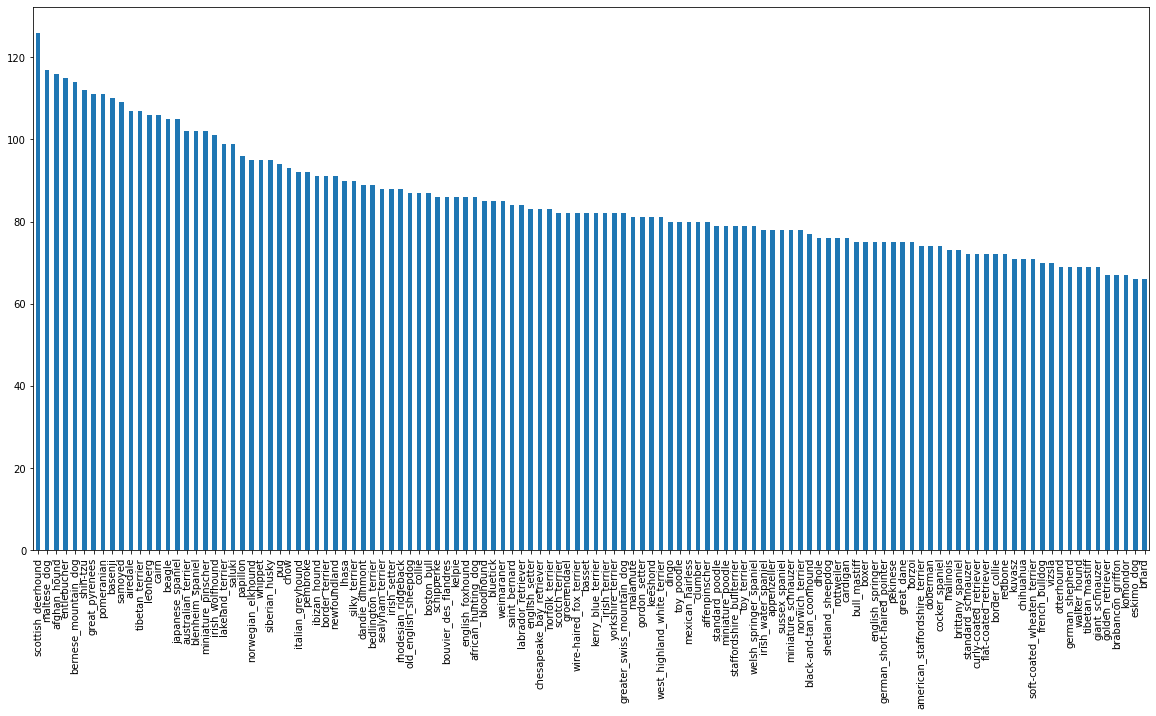

In [ ]:
# How many images are there of each breed 
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
from IPython.display import Image

Lets get a list of all our images file pathname

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
filenames=["drive/MyDrive/Colab Notebooks/Dog Vision/train/"+fname+".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/MyDrive/Colab Notebooks/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check weather number of filenames matches number of actual images files
import os
os.listdir("drive/MyDrive/Colab Notebooks/Dog Vision/train")
if len(os.listdir("drive/MyDrive/Colab Notebooks/Dog Vision/train"))==len(filenames):
  print("ok")
else: print("not ok")

ok


In [ ]:
import numpy as np
labels = labels_csv["breed"]
labels=np.array(labels)
len(labels)

10222

In [ ]:
# See if number of labels matches the number of fill names
if len(labels)==len(filenames):
  print("ok")
else: print("not ok")

ok


In [ ]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single labels into array of bools

print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into bools
bool_labels=[labels==unique_breeds for labels in labels]

In [ ]:
len(bool_labels)

10222

In [ ]:
len(labels)

10222

In [ ]:
# Turning bool array into ints

print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(bool_labels[0].argmax())
print(bool_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
bool_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Creating our own validation set

In [ ]:
# Set up X any y
X= filenames
y= bool_labels

len(X)

10222

In [ ]:
# set number of images to use for experimenting

NUM_IMAGES = 1000 # @param {type:"slider", min:1000, max:10000, step:100}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val=train_test_split(X[: NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:2], y_train[:2]

(['drive/MyDrive/Colab Notebooks/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Colab Notebooks/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,

## Preprocessin Images(Images--> Tensors)

In [ ]:
from matplotlib .pyplot import imread
image = imread(filenames[42])
image.shape # Converts image into numpy.ndarray

(257, 350, 3)

In [ ]:
tf.constant(image)[:2] # Converts image into tensor 

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
IMG_SIZE=224 # define image size
# Create a function for preprocessing images
def process_image(image_patch, img_size=IMG_SIZE):
  """
  Image ---> Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_patch)
  # Turn jpg image into tensor with 3 color chanel
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the color channel value from 0 - 255 to 0-1 values
  image= tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image to our desired value(224, 224)
  image=tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
tensor=tf.io.read_file(filenames[26])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tensor=tf.image.decode_jpeg(tensor, channels=3)
tensor

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

In [ ]:
tensor=tf.image.convert_image_dtype(tensor, tf.float32)
tensor

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.23137257, 0.26666668, 0.25490198],
        [0.2509804 , 0.28627452, 0.27450982],
        [0.2784314 , 0.3137255 , 0.3019608 ],
        ...,
        [0.45098042, 0.5019608 , 0.42352945],
        [0.45098042, 0.5019608 , 0.42352945],
        [0.43137258, 0.48235297, 0.4039216 ]],

       [[0.25490198, 0.2901961 , 0.2784314 ],
        [0.28235295, 0.31764707, 0.30588236],
        [0.30980393, 0.34509805, 0.33333334],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.45882356, 0.50980395, 0.43137258],
        [0.454902  , 0.5058824 , 0.427451  ]],

       [[0.26666668, 0.3019608 , 0.2901961 ],
        [0.29803923, 0.33333334, 0.32156864],
        [0.3254902 , 0.36078432, 0.34901962],
        ...,
        [0.44705886, 0.49803925, 0.41960788],
        [0.47058827, 0.52156866, 0.4431373 ],
        [0.48235297, 0.53333336, 0.454902  ]],

       ...,

       [[0.6784314 , 0.7843138 , 0.60784316],
        [0.64

In [ ]:
tf.image.resize(tensor, size=[IMG_SIZE, IMG_SIZE])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.25410587, 0.2894    , 0.2776353 ],
        [0.29784313, 0.33313724, 0.32137254],
        [0.29804096, 0.33333507, 0.32157037],
        ...,
        [0.41461015, 0.46559054, 0.38715917],
        [0.44833592, 0.4993163 , 0.42088494],
        [0.44921985, 0.5002003 , 0.42176887]],

       [[0.27608263, 0.31137675, 0.29961205],
        [0.30547515, 0.34076926, 0.32900456],
        [0.2880393 , 0.3233334 , 0.3115687 ],
        ...,
        [0.41783687, 0.46881726, 0.3903859 ],
        [0.46009547, 0.51107585, 0.4326445 ],
        [0.48616162, 0.537142  , 0.45871064]],

       [[0.29875293, 0.33404705, 0.3144392 ],
        [0.27189255, 0.30718666, 0.28757882],
        [0.28608775, 0.32138187, 0.30177402],
        ...,
        [0.47503573, 0.5260161 , 0.44758475],
        [0.49345425, 0.54443467, 0.46600327],
        [0.4703167 , 0.5212971 , 0.44286573]],

       ...,

       [[0.77551085, 0.7260472 , 0.59820485],
        [0.86

## Turning our data into batches

in order to use tensorflow effectively we need our data in form of tensor tuple ---- `(image, lable)`

In [ ]:
# Create asimple funtion to return a tensor tuple
def get_image_label(image_path, label):
  """
  Takes an image file path and associated label, preprocesses the image and 
  returns a tensor tuple
  """
  image=process_image(image_path)
  return image, label

In [ ]:
(process_image (X[42], tf.constant(y[42])))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

now we've got a way to turn our data of Tensors in form: `( image, label)`, lets make a function to turn all of our data (X, y) into batches

In [ ]:
# Define the batch size 32 is a good start
BATCH_SIZE=32

#Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  creates batches of data out of image (X), and label (y) pairs.
  Shuffels the data if its training data but  dosent shuffle if its validation data
  Also accepts test data as input( no labels )
  """
  # if the data is the test data set , we probebly dont have labels
  if test_data:
    print("Creating test data batches.... ")
    #  Creates a Dataset whose elements are slices of the given tensors.
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X)))# only filepaths no labels
    # A function mapping a dataset element to another dataset element.
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is valid data set, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches ....")
    data= tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                             tf.constant(y))) #labels
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training batches.... ")
    #Turn filepaths and labels into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))

    #Shuffling pathnames and labels before mapping image prerocessor is faster than shuffling after mapping
    data= data.shuffle(buffer_size=len(X))
    #Create image lable tuples this also turns the image  path into preprocessed image
    data= data.map(get_image_label)
    #Turns traing data into batches
    data_batch= data.batch(BATCH_SIZE)
    return data_batch

In [ ]:
# Creating training and validation data batches
train_data= create_data_batches(X_train , y_train)
val_data= create_data_batches(X_val, y_val, valid_data=True)

Create training batches.... 
Creating validation data batches ....


In [ ]:
#Check out the diffrent attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is now in batches hower this can be little hard to understand , lets visualize them

In [ ]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
  #set up frame
  plt.figure(figsize=(20, 20))
  #Loop through 25 images
  for i in range(25):
    # Create subplots 5 rows 5 columns
    ax=plt.subplot(5, 5, i+1)
    #Display images
    plt.imshow(images[i])
    # Add images label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis("off")


In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images, train_labels=next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.07058824, 0.06666667, 0.0509804 ],
          [0.07377452, 0.06985295, 0.05416667],
          [0.07450981, 0.07058824, 0.05490196],
          ...,
          [0.6536765 , 0.6536765 , 0.30857843],
          [0.65024513, 0.65024513, 0.30514708],
          [0.64705884, 0.64705884, 0.3019608 ]],
 
         [[0.05626751, 0.05234594, 0.03665967],
          [0.05945379, 0.05553222, 0.03984594],
          [0.06265046, 0.05872888, 0.04304261],
          ...,
          [0.6393558 , 0.6393558 , 0.2942577 ],
          [0.63659567, 0.63659567, 0.29149762],
          [0.6363183 , 0.6363183 , 0.29122025]],
 
         [[0.0414916 , 0.03757003, 0.02188376],
          [0.04740186, 0.04348028, 0.02779401],
          [0.05376675, 0.04984518, 0.0341589 ],
          ...,
          [0.62898016, 0.6390379 , 0.29729244],
          [0.628589  , 0.6386467 , 0.2969013 ],
          [0.628589  , 0.6386467 , 0.2969013 ]],
 
         ...,
 
         [[0.69373184, 0.68645763, 0.45622298],
          [0.76742

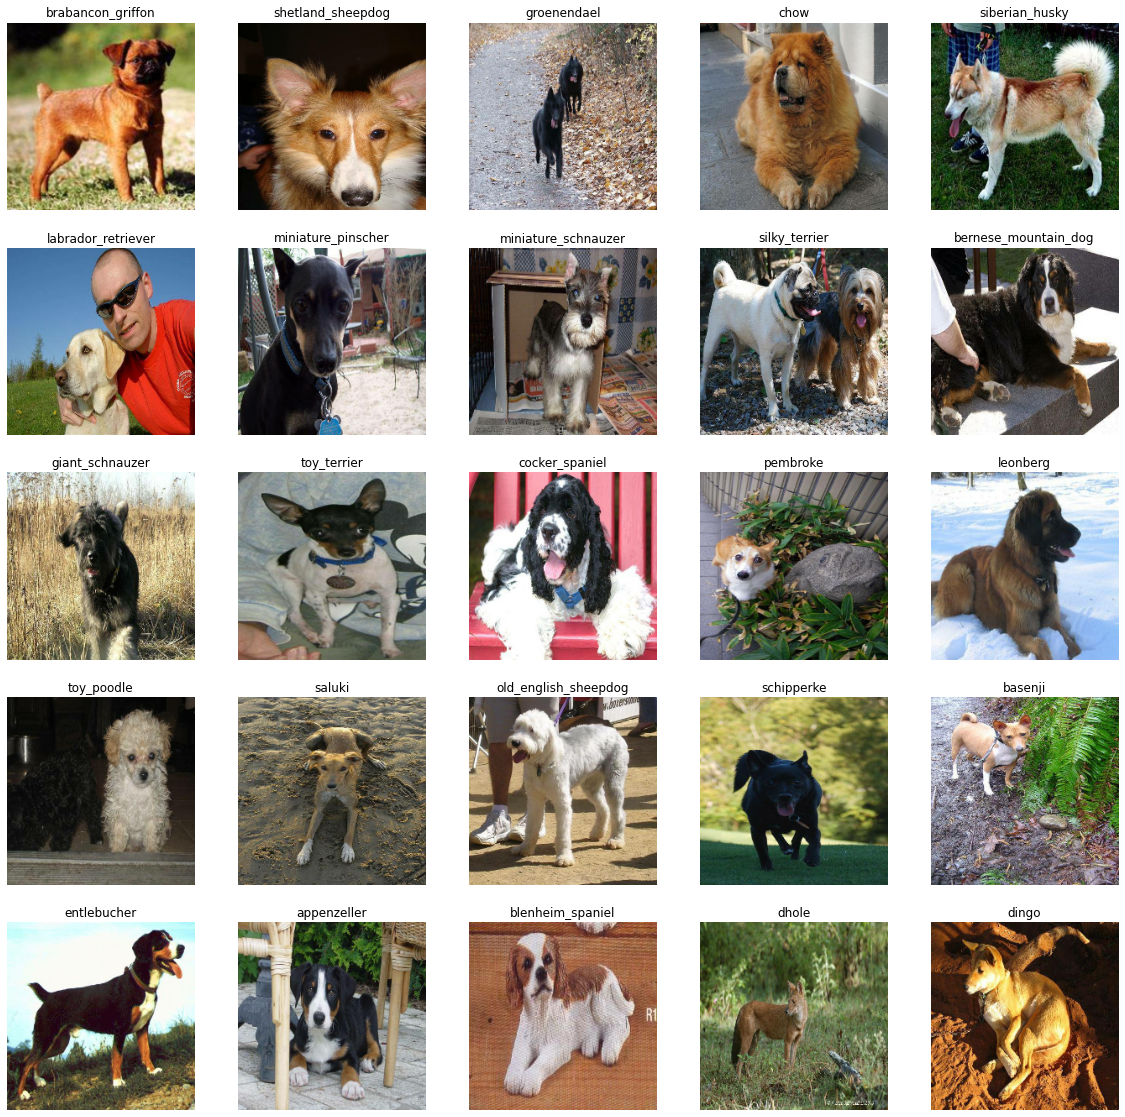

In [ ]:
#Now lets visualize the data in training batch
show_25_images(train_images, train_labels)

In [ ]:
train_labels

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

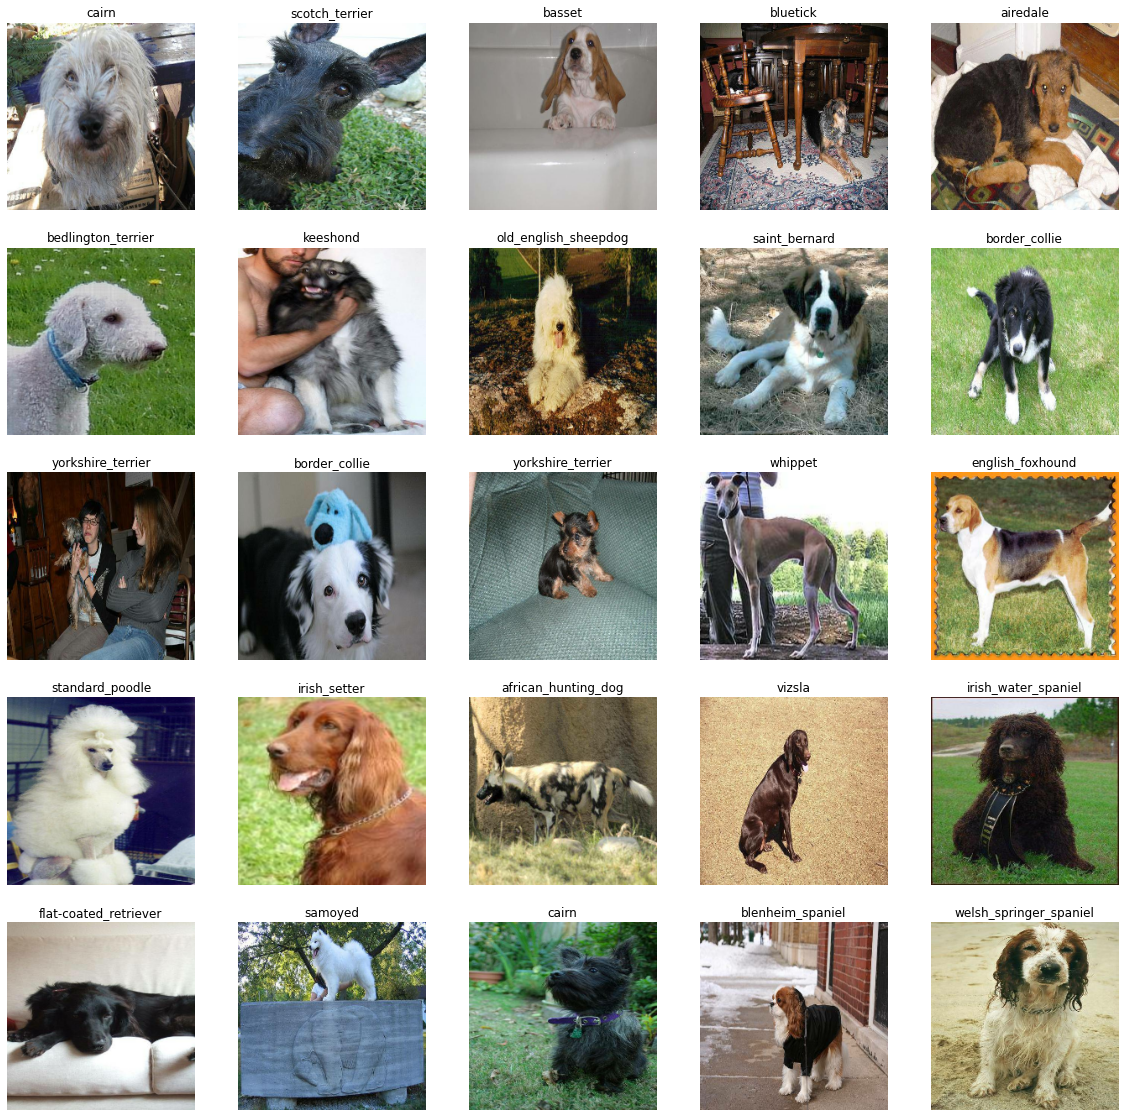

In [ ]:
# Now lets visualize our validation set
val_images, val_labels= next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
Before we build a model , there are a few things we need to define 
* The input shape (our image shape , in form of tensors) to our model
* The output shape (our labels, in the form of tensors) of our model
* The Url of the model we want to use https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch hight width color channel

# Setup output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

#Set up model URL from tensor flow hub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Input shape, output shape, model url is ready now create a funtion wfich:
*  takes model name , inpute shape, output shape as parameters
* Its sequentail in nature(runs keras layers in sequentaial order)
* it compiles it (evaluate and improve it)
* builds the model(tells the input size)|
* Returns the model


In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Using model:", model_url)

  #Setup model layers
  model=tf.keras.Sequential([
                             hub.KerasLayer(model_url), #INPUT LAYER
                             tf.keras.layers.Dense(units=output_shape,
                                                   activation="softmax")# Output Layer
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build model
  model.build(input_shape)

  return model

In [ ]:
model=create_model()
model.summary()

Using model: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


Creating callbacks
Callbacks are helper function which helps the model to
* save its progress
* check its progress
* stop if its not improving

we will create 2 callbacks:
1. Tensorbord
2. Stop training if not improving

To set up tensorboard call back we need to do 3 things:
1. Load tensorboard extension using `%load_ext`
2. Create tensorboard callback which is able to save training logs in a directory and pass it to models `fit()` function
3. Visualize the logs using `%tensorboard` magic function 

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

#Create a function to build a tensor board callback

def create_tensorboard_callback():
  logdir=os.path.join("drive/MyDrive/Colab Notebooks/Dog Vision/logs",
                       #Make it so logs get tracked whenever we run experiment
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


Early stopping callback

it helps to avoid overfitting it stops the model when a certain evaluation matrix stops improving

In [ ]:
#Create an early stopping callback
early_stoping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                               patience=3)

#Training a model on subset of data
Test run to see if our model is working properly

In [ ]:
#Epoch is number of chances our model gets to work on the dataset to find the pattern
NUM_EPOCHS= 100 #@param{type: "slider", min:10, max:100, step:10}

In [ ]:
print("GPU", "available YES" if tf.config.list_physical_devices("GPU")  else "not available")

GPU available YES


Lets create a function that trains a model
* Create a model using `create model function()`
* Set up tensorboard callback using `create_tensorboard_callback()`
* Call `fit()` function on our model passing training set, validation set, `NUM_EPOCHS` and callbacks required
* Return the model

In [ ]:
# build a function to train and return the model 
def train_model():
   """
   Trains a given model
   """

   #Create a model
   model=create_model()
   
   #Create a new tensorboard callback everytime we train the model
   tensorboard=create_tensorboard_callback()

   #Fit the model to the training batch
   model.fit(
       x=train_data,
       epochs=NUM_EPOCHS,
       validation_data=val_data,
       validation_freq=1,
       callbacks=[tensorboard, early_stoping])
   #Return the fitted model
   return model

In [ ]:
model=train_model()

Using model: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
 5/25 [=====>........................] - ETA: 2:50 - loss: 5.3180 - accuracy: 0.0063

KeyboardInterrupt: ignored

###Checking tensorboard logs

we will use `%tensorboard` to visualize the logs of the prevous model saved in our directory

In [ ]:
%tensorboard --logdir drive/MyDrive/Colab\ Notebooks/Dog\ Vision/logs

In [ ]:
## Making and evaluating prections using trained model
predictions=model.predict(val_data, verbose=1)

In [ ]:
predictions

In [ ]:
np.shape(predictions)

In [ ]:
len(y_val)

In [ ]:
y_val

In [ ]:
len(unique_breeds)

In [ ]:
index=1
print(f"predictions : {predictions[index]}")
print(f"max prediction : {np.max(predictions[index])}")
print(f"index of max prediction: {np.argmax(predictions[index])}")
print(f"expected breed: {unique_breeds[np.argmax(predictions[index])]}")

having this functionality is great but we have to do it on a scale, it will be even better if we are able to see the image on which the prediction is bieng made opon
**Note:** prediction probailities are also known as confidence level


In [ ]:
## Turn prediction probility into thier resoective label
def get_pred_label(prediction_probablity):
  """
  Returns the label of the with the highest confidence level
  """
  return unique_breeds[np.argmax(prediction_probablity)]

get_pred_label(predictions[1])

NameError: ignored

In [ ]:
val_data

Now since our val_data is in batch dataset we have to unbatchify it to make prediction on it and compare them to validation labels

In [ ]:

images_=[]
labels_=[]
for images, labels in val_data.unbatch().as_numpy_iterator():
  images_.append(images)
  labels_.append(unique_breeds[np.argmax(labels)])

get_pred_label(labels_[0])


In [ ]:
#Create a function to unbatchify it
def unbatchify(val_data):
  """
  Takes data in form of (images, labels) Tensors 
  in returns in form of seperate arrays images and labels
  """
  images=[]
  labels=[]
  for image, label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels


In [ ]:
val_images, val_labels = unbatchify(val_data)

Now we have functions to get :
1. prediction labels
2. validation images
3. validation labels

Create a funvtion to visualize them
1. takes array of prediction probabilities , array of truth labels, array of images and an integer
2. converts predicted probailities into labels
3. plots its prediction probility , truth labels, pridicted label and the targated image in the same plot

In [ ]:
def plot_pred(prediction_probabilities, truth_labels, images, n=1):
  pred_prob, truth_label, image= prediction_probabilities[n], truth_labels[n], images[n]
  pred_label=get_pred_label(pred_prob)

  #Ploting image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Setting color
  if truth_label==pred_label: color="green"
  else: color="red"

  # Title
  plt.title(("{} {:2.0f}% {}").format(truth_label,np.max(pred_prob*100), pred_label),
            color=color)

plot_pred(predictions, val_labels, val_images)


In [ ]:
plot_pred(prediction_probabilities= predictions, 
          truth_labels=val_labels, 
          images=val_images, n=77)

Make a function to view top 10 predictions:

this function will:
1. Take input of truth labels, array of prediction probilities and an integer
2. Finds probable label with `get_pred_label()`
3. finds top 10:
 > 1. Prediction probabilites value
   2. Prediction probaility index
   3. Predicted labels
3. plots thies confidence levels and shows the plot of truth label in green color



In [ ]:
def plot_pred_conf(truth_labels, prediction_probabilities, n=1):

  pred_prob, truth_label=prediction_probabilities[n], truth_labels[n]
  # pred_label=get_pred_label(pred_prob)

  #Finding top 10s
  pred_indexs=pred_prob.argsort()[-10:][::-1]
  pred_values=pred_prob[pred_indexs]
  pred_labels= unique_breeds[pred_indexs]

  #Plot
  top_plot=plt.bar(np.arange(len(pred_labels)), pred_values, color="grey")
  plt.xticks(np.arange(len(pred_labels)), pred_labels , rotation="vertical")
  
  #setting color of truth label plot
  if np.isin(truth_label, pred_labels):
    top_plot[np.argmax(truth_label==pred_labels)].set_color("green")



In [ ]:
plot_pred_conf(val_labels, predictions, n=1)

Now we have some functions yo visualize and evaluate our model lets impliment them

In [ ]:
# Lets check out our few predictions and thier values

num_cols=2
num_rows=3
num_images=num_cols*num_rows
i_multiplier=20

# Creating frame
plt.figure(figsize=(num_cols*10, num_rows*5))
for i in range(num_images):
  plt.subplot(num_rows, num_cols*2, 2*i+1)
  plot_pred(prediction_probabilities= predictions, 
          truth_labels=val_labels, 
          images=val_images, n=i+i_multiplier)
  plt.subplot(num_rows, num_cols*2, 2*i+2)
  plot_pred_conf(prediction_probabilities= predictions, 
          truth_labels=val_labels, n=i+i_multiplier)
  
plt.tight_layout(h_pad=1)
plt.show()

  

In [ ]:
pl_list=[]
for n in range(len(val_labels)):
  pl_list.append(get_pred_label(predictions[n]))

In [ ]:
import sklearn 
cf=sklearn.metrics.confusion_matrix(val_labels, pl_list)
disp=sklearn.metrics.ConfusionMatrixDisplay(cf)
disp.plot()
plt.show

In [ ]:
#Create a function to save the model
def save_model(model, suffix=None):
  modeldir=os.path.join("drive/MyDrive/Colab Notebooks/Dog Vision/model" ,
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+"-"+suffix+".h5"
  print(f"Saving model to {model_path}...")
  model.save(model_path)
  return model_path



In [ ]:
#Create a function to load a model
def load_model(model_path):
  print(f"Loadin a model from {model_path} ...")
  model=tf.keras.models.load_model(model_path,
                             custom_objects={"KerasLayer": hub.KerasLayer})
  return model

In [ ]:
save_model(model, suffix= "1000 images-mobilenetv2-Adam")

In [ ]:
loaded_model=load_model("drive/MyDrive/Colab Notebooks/Dog Vision/model/20220813-08481660380512-1000 images-mobilenetv2-Adam.h5")

In [ ]:
model.evaluate(val_data)

In [ ]:
loaded_model.evaluate(val_data)

In [ ]:
#Training model of complete data set
len(X), len(y)

In [ ]:
#Create a data batch with the full dataset
full_data=create_data_batches(X,y)

In [ ]:
full_data

In [ ]:
#create a model
full_model=create_model()

In [ ]:
#Create model callback
full_model_callback=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy", 
                                                           patience=3)

Running the below will take 30 min or longer for the first epoch because gpu will load all the images in memory

In [ ]:
#Fit the full model to full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_callback, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix="full_image_set-mobilenetv2-Adam")

In [ ]:
loaded_full_model=load_model("drive/MyDrive/Colab Notebooks/Dog Vision/model/20220813-09201660382416-full_image_set-mobilenetv2-Adam.h5")

Loadin a model from drive/MyDrive/Colab Notebooks/Dog Vision/model/20220813-09201660382416-full_image_set-mobilenetv2-Adam.h5 ...


## Making predictions on the test dataset
Since our model is trained on images in the form of batch tensors , to make predixtions on test data, we will have to get it into same format

We will use `create_data_batches()` which can take list of file names and convert them into tensor batches

To make predictions on the test data we will:
* Get test image filenames
* Convert filenames into test batches with help of `create_data_batches()` and setting `test_data` parameter to `True` (Since test data dosent have labels)
* Create pridictions array by calling `predict` methode on our model

In [ ]:
#Load test image filenames
test_path="drive/MyDrive/Colab Notebooks/Dog Vision/test/"
test_filenames=[test_path + fname for fname in os.listdir(test_path)]

In [ ]:
test_filenames[:10]

['drive/MyDrive/Colab Notebooks/Dog Vision/test/e18fbb12037c297b90642e99073cd6b4.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/dd51cac7c6e1e091b26545aec86dabf3.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/df92d68c07ec91b2f67cec77980e00cf.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/e73dc6a8f2d7c941f28c0a5298bc5bdc.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/e26901a9e04f0ba89765fb9b9b7f675f.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/df624595296500c98e3a1bf4d9ea917b.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/deb66780609abfef7f5048df02149839.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/e18c30f7ba3680d75ff326ccb71642e0.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/dcab2d03a686ab3f31d1bc3e5700f6d1.jpg',
 'drive/MyDrive/Colab Notebooks/Dog Vision/test/e5a78d4d53fc5957cc9dedd318139d3d.jpg']

In [ ]:
#Create test data batch
test_data=create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

**NOTE** : Calling predict on our full model and passing data batch will take a lot of time (~ 1 hour)

In [ ]:
#Make prediction on test_data with loaded_full_model

test_predictions=loaded_full_model.predict(test_data, verbose=1)

In [ ]:
np.savetxt("drive/MyDrive/Colab Notebooks/Dog Vision/preds_array.csv",
            test_predictions, delimiter=",")


In [ ]:
test_predictions= np.loadtxt("drive/MyDrive/Colab Notebooks/Dog Vision/preds_array.csv",
           delimiter=",")

In [ ]:
test_predictions.shape

In [ ]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))

In [ ]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [ ]:
preds_df["id"]=test_ids

In [ ]:
preds_df.head()

id affenpinscher afghan_hound  \
0  e18fbb12037c297b90642e99073cd6b4           NaN          NaN   
1  dd51cac7c6e1e091b26545aec86dabf3           NaN          NaN   
2  df92d68c07ec91b2f67cec77980e00cf           NaN          NaN   
3  e73dc6a8f2d7c941f28c0a5298bc5bdc           NaN          NaN   
4  e26901a9e04f0ba89765fb9b9b7f675f           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
preds_df[list(unique_breeds)]=test_predictions

In [ ]:
preds_df.to_csv("drive/MyDrive/Colab Notebooks/Dog Vision/predictions_mobilenetV2_complete_dataset_1.csv",
                index=False)

In [ ]:
# making predictions on custom inputs
custom_path="/content/drive/MyDrive/Colab Notebooks/Dog Vision/custom_photos/"
custom_images_path=[custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_images_path

['/content/drive/MyDrive/Colab Notebooks/Dog Vision/custom_photos/download (3).jfif',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/custom_photos/download (2).jfif',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/custom_photos/istockphoto-1193747353-612x612.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/custom_photos/stray-dog-Delhi.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog Vision/custom_photos/download (1).jfif']

In [ ]:
custom_data=create_data_batches(custom_images_path, test_data=True)
custom_data

Creating test data batches.... 


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
custom_preds=loaded_full_model.predict(custom_data)

In [ ]:
custom_preds_labels=[get_pred_label(pred) for pred in custom_preds]

In [ ]:
custom_preds.shape

(5, 120)

In [ ]:
custom_preds_labels

['golden_retriever', 'mexican_hairless', 'dingo', 'great_dane', 'ibizan_hound']

In [ ]:
custom_images=[]

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

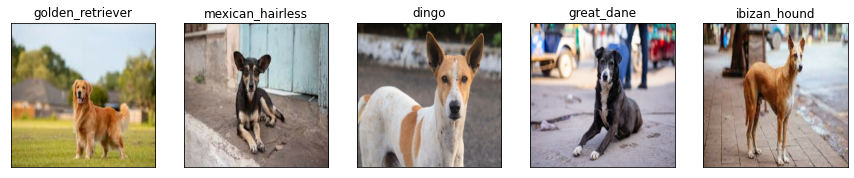

In [ ]:
plt.figure(figsize=(15,15))

for i, images in enumerate(custom_images):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(images)
